In [438]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.backend_bases
import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_selector

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag # for bagging
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Model interpretation
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance
import eli5 # "explain it to me like I'm 5"
from eli5.sklearn import PermutationImportance

#eda
import pandas_profiling

# Misc
import warnings
warnings.filterwarnings("ignore")

## Explore data: all year NONA

In [439]:
df_nona = pd.read_csv("./processed_data/df_nona.csv")

In [440]:
df_nona.dtypes

year                 float64
name                  object
state                 object
total_mwh            float64
total_cust           float64
no                   float64
type                  object
saidi_nomed          float64
saifi_nomed           object
caidi_nomed           object
circuits             float64
voltage              float64
nerc                  object
gen_mwh               object
purchase_mwh         float64
pv_mwh               float64
wind_mwh             float64
nm_mwh               float64
ee_mwh               float64
dem_res_customers    float64
dem_res_mwh           object
pv_pct               float64
wind_pct             float64
nm_pct               float64
ee_pct               float64
dem_res_cust_pct     float64
circuit_pct          float64
dtype: object

In [441]:
# convert object variables to categories
for col in df_nona.select_dtypes(include="object"):
    df_nona[col] = df_nona[col].astype('category')

In [442]:
df_nona.shape

(753, 27)

In [549]:
df_nona

,year,name,state,total_mwh,total_cust,no,type,saidi_nomed,saifi_nomed,caidi_nomed,...,nm_mwh,ee_mwh,dem_res_customers,dem_res_mwh,pv_pct,wind_pct,nm_pct,ee_pct,dem_res_cust_pct,circuit_pct
0,2019.0,"Allamakee-Clayton El Coop, Inc",IA,133395.0,9987.0,329.0,Cooperative,141.600,0.965,146.73575,...,1035.893,1124.000,2768.0,0.0,0.776453,1.079501e-04,0.776561,0.842610,27.716031,0.000000
1,2019.0,City of Ames - (IA),IA,639455.0,26956.0,554.0,Municipal,15.790,0.19,83.105263,...,0.000,4218.000,10683.0,0.0,0.000000,0.000000e+00,0.000000,0.659624,39.631251,0.000000
2,2019.0,City of Anaheim - (CA),CA,2237118.0,120279.0,590.0,Municipal,42.120,0.57,73.894737,...,0.000,26739.841,14.0,0.0,0.000000,0.000000e+00,0.000000,1.195281,0.011640,100.000000
3,2019.0,Arizona Public Service Co,AZ,27844577.0,1260386.0,803.0,Investor Owned,86.800,0.843,102.9656,...,0.000,143225.000,693725.0,977215.0,0.000000,0.000000e+00,0.000000,0.514373,55.040678,0.000000
4,2019.0,Entergy Arkansas LLC,AR,21818109.0,713072.0,814.0,Investor Owned,308.800,1.72,179.53488,...,0.000,248663.000,23369.0,0.0,0.000000,0.000000e+00,0.000000,1.139709,3.277229,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2013.0,Withlacoochee River Elec Coop,FL,3565155.0,202352.0,20885.0,Cooperative,115.000,1.621,70.943862,...,0.000,38.000,202310.0,1532,0.000000,0.000000e+00,0.000000,0.001066,99.979244,0.000000
749,2013.0,Tucson Electric Power Co,AZ,9278919.0,409529.0,24211.0,Investor Owned,63.499,0.683,92.970717,...,48733.781,138815.000,37.0,.,0.525209,8.621694e-07,0.525210,1.496026,0.009035,0.000000
750,2013.0,Cass County Elec Coop Inc,ND,1119192.0,39897.0,24949.0,Cooperative,46.000,1.11,41.441441,...,125.642,34.000,9985.0,18380,0.005819,5.406847e-03,0.011226,0.003038,25.026944,25.641026
751,2013.0,Western Indiana Energy REMC,IN,628689.0,16603.0,25295.0,Cooperative,238.010,.,.,...,14.400,1214.000,350.0,7288,0.002290,0.000000e+00,0.002290,0.193100,2.108053,0.000000


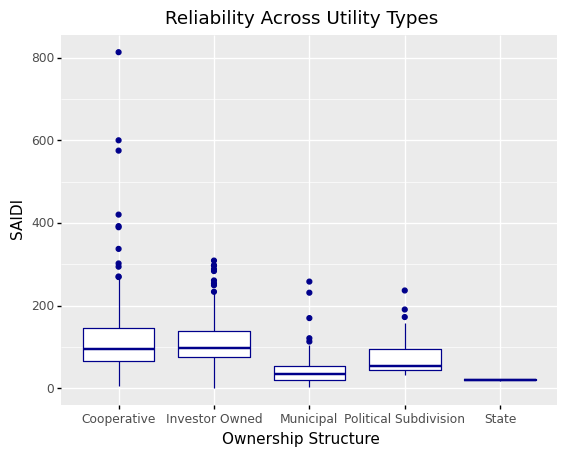

<ggplot: (8783597183853)>

In [829]:
plot = (
ggplot(df_nona,aes('type', 'saidi_nomed')) + 
    geom_boxplot(color="darkblue") +
    labs(title="Reliability Across Utility Types", y="SAIDI", x= "Ownership Structure") 
      )

plot.save('./deliverables/outlier_demonstration.png')

In [759]:
# plot = (
# ggplot(df_nona, aes('saidi_nomed')) + 
# geom_dotplot(dotsize=.35) +
#     labs(title="Reliability Score Outliers", x= "SAIDI", y="Frequency")
#       )

# plot
#plot.save('outlier_demonstration.png')

In [560]:
df_nona.describe()

,year,total_mwh,total_cust,no,saidi_nomed,circuits,voltage,purchase_mwh,pv_mwh,wind_mwh,nm_mwh,ee_mwh,dem_res_customers,pv_pct,wind_pct,nm_pct,ee_pct,dem_res_cust_pct,circuit_pct
count,753.00000,7.530000e+02,7.530000e+02,753.000000,753.000000,753.000000,753.000000,7.530000e+02,753.000000,753.000000,753.000000,7.530000e+02,7.530000e+02,753.000000,7.530000e+02,753.000000,753.000000,753.000000,753.000000
mean,2016.14741,9.491403e+06,4.717673e+05,12210.077025,103.321709,578.096946,158.565737,4.983354e+06,2895.621834,41.729469,2944.196894,1.205235e+05,5.195805e+04,0.062558,2.717359e-03,0.065321,1.090554,13.848901,27.721089
std,2.01940,1.626576e+07,8.743406e+05,7703.902883,70.737452,931.502347,422.683265,9.380518e+06,14735.728422,551.941763,14783.180107,2.735273e+05,1.588258e+05,0.255385,1.277408e-02,0.257071,1.778828,18.552900,38.672552
min,2013.00000,5.743200e+04,2.109000e+03,329.000000,0.000000,5.000000,0.000000,6.120700e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2014.00000,5.169800e+05,2.480200e+04,5417.000000,59.436000,67.000000,0.000000,5.238610e+05,0.000000,0.000000,0.000000,6.497670e+02,2.040000e+02,0.000000,0.000000e+00,0.000000,0.094082,0.148756,0.000000
50%,2016.00000,2.386548e+06,9.799200e+04,13511.000000,89.820000,181.000000,0.000000,1.585993e+06,3.390000,0.000000,4.614000,6.165275e+03,3.700000e+03,0.000107,0.000000e+00,0.000173,0.572145,6.518534,0.000000
75%,2018.00000,1.222336e+07,5.082480e+05,16865.000000,134.000000,747.000000,73.000000,5.194040e+06,204.060000,0.049000,227.470000,1.213363e+05,2.098000e+04,0.013018,8.777597e-07,0.015888,1.268608,22.084739,58.567280
max,2019.00000,1.119557e+08,5.236724e+06,55937.000000,812.900000,5619.000000,2869.000000,9.677809e+07,174137.899000,11648.213000,174137.899000,2.865573e+06,1.323922e+06,2.737364,1.141962e-01,2.737446,13.437089,99.996257,100.000000


In [651]:
df_nona_no_outliers = df_nona[df_nona.saidi_nomed <= 500]

## Outcomes I wanna use: 

In [443]:
y = df_nona['saidi_nomed']
X = df_nona[['state','type','total_mwh',
           'nerc','circuits','voltage','nm_pct','ee_pct',
           'dem_res_cust_pct','circuit_pct']]

In [444]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1997)

In [445]:
print(train_X.shape[0]/df_nona.shape[0])
print(test_X.shape[0]/df_nona.shape[0])

0.749003984063745
0.250996015936255


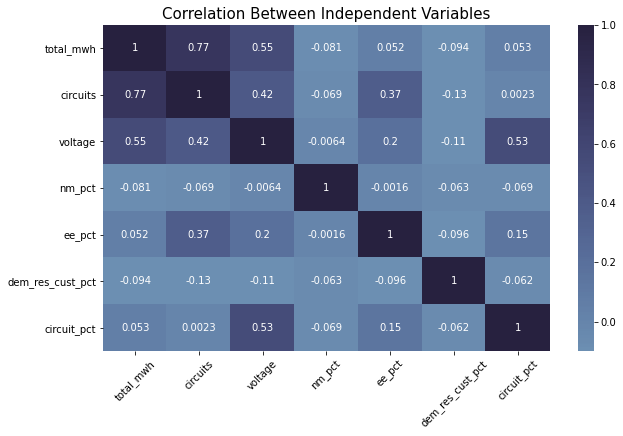

In [837]:
#creating pairwise correlation of columns using Pearson's R,
corr = train_X.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

sns.heatmap(corr, annot=True, 
            vmin = -0.1, vmax=1, center=0,
          cmap=cmap
           )

plt.xticks(rotation=45) 

plt.title('Correlation Between Independent Variables', fontsize=15)

plt.savefig('correlation_matrix.png', bbox_inches="tight")

In [447]:
df_nona.skew().sort_values(ascending = False)

wind_mwh             19.220489
pv_mwh                7.801389
nm_mwh                7.734169
pv_pct                7.137123
nm_pct                7.016906
wind_pct              5.986253
dem_res_customers     4.838993
purchase_mwh          4.790588
ee_mwh                4.593864
voltage               3.931988
ee_pct                3.566900
total_cust            3.489925
total_mwh             3.252259
saidi_nomed           2.940715
circuits              2.916302
dem_res_cust_pct      1.970340
no                    1.522476
circuit_pct           0.919898
year                 -0.042675
dtype: float64

In [448]:
train_X.circuits

202      54.0
644     769.0
379     133.0
363      19.0
218    4518.0
        ...  
103     291.0
247     191.0
656     186.0
304     780.0
569     182.0
Name: circuits, Length: 564, dtype: float64

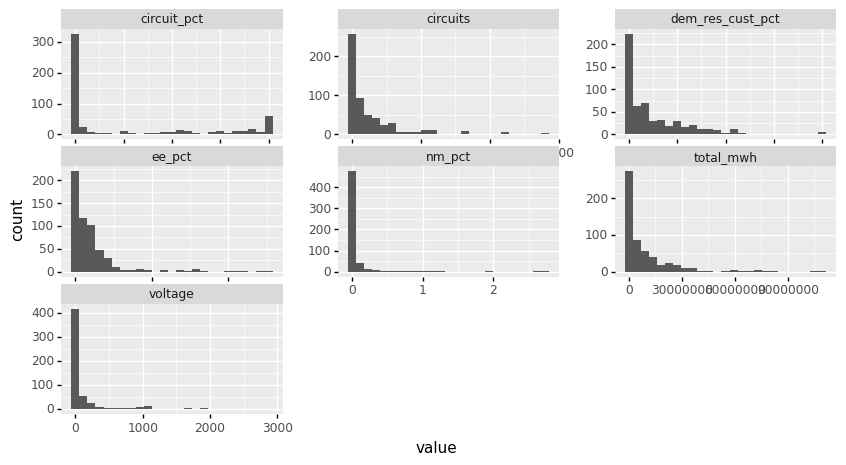

<ggplot: (8783644059977)>

In [449]:
# Plot the continuous variables 
df_num = train_X.select_dtypes(include="number").melt()

(
    ggplot(df_num,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

# For the report

In [450]:
circuits_report = train_X.copy().drop(columns = train_X.loc[:, train_X.columns != 'circuits'])

In [451]:
circuits_report = circuits_report.rename(columns = {"circuits": "Circuits"})

In [452]:
circuits_report['Circuits (Log Transformed)'] = np.log(circuits_report['Circuits'])

In [453]:
circuits_report

,Circuits,Circuits (Log Transformed)
202,54.0,3.988984
644,769.0,6.645091
379,133.0,4.890349
363,19.0,2.944439
218,4518.0,8.415825
...,...,...
103,291.0,5.673323
247,191.0,5.252273
656,186.0,5.225747
304,780.0,6.659294


In [454]:
# Generate side by side comparison
plot = (
    ggplot(circuits_report.melt(),aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25}) +
    xlab("Number of Circuits") +
    ylab("Frequency")
)

plot.save('skewedness_demonstration.png')

## Transform the features and outcome

In [455]:
# use full dataset
df_nona_log = df_nona.copy()

# log some variables
df_nona_log['total_mwh'] = np.log(df_nona_log['total_mwh'])
df_nona_log['circuits'] = np.log(df_nona_log['circuits'])
df_nona_log['circuit_pct'] = np.log(df_nona_log['circuit_pct'] + 1)
df_nona_log['ee_pct'] = np.log(df_nona_log['ee_pct'] + 1)

# df_nona_log['voltage'] = np.log(df_nona_log['voltage'] + 1)
#df_nona_log['nm_pct'] = np.log(df_nona_log['nm_pct'] + 1)
#df_nona_log['dem_res_pct'] = np.log(df_nona_log['dem_res_pct'] + 1)

# voltage, net metered, and remand response percent 
median_voltage_pct = df_nona.loc[df_nona_log['voltage'] > 0,'voltage'].median()
df_nona_log['voltage'] =  np.where(df_nona_log['voltage']==0,0,np.where(df_nona_log['voltage'] <= median_voltage_pct,1,2))

# demand response pct
median_dr_pct = df_nona.loc[df_nona_log['dem_res_cust_pct'] > 0,'dem_res_cust_pct'].median()
df_nona_log['dem_res_cust_pct'] =  np.where(df_nona_log['dem_res_cust_pct']==0,0,np.where(df_nona_log['dem_res_cust_pct'] <= median_dr_pct,1,2))

# nm percent 
median_nm_pct = df_nona.loc[df_nona_log['nm_pct'] > 0,'nm_pct'].median()
df_nona_log['nm_pct'] =  np.where(df_nona_log['nm_pct']==0,0,np.where(df_nona_log['nm_pct'] <= median_nm_pct,1,2))

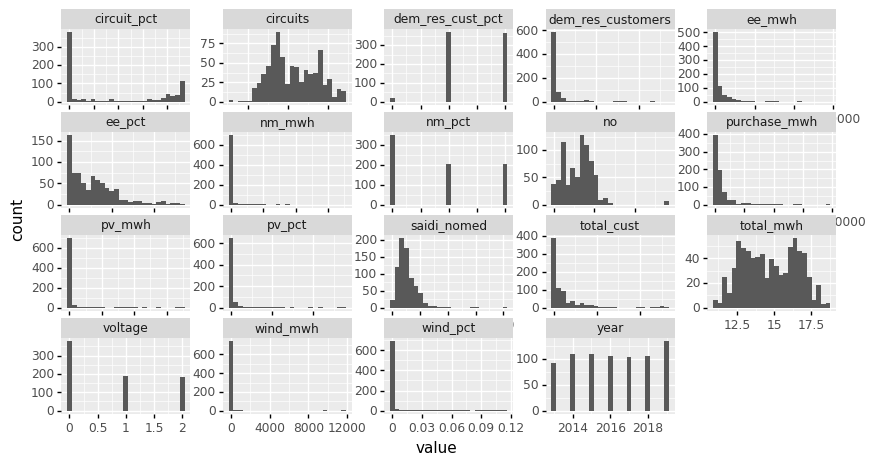

<ggplot: (8783645135557)>

In [456]:
# Plot the continuous variables 
df_nona_num = df_nona_log.select_dtypes(include="number").melt()

(
    ggplot(df_nona_num,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

### Let's dummify NERC regions, state, and utility type

In [457]:
nerc_dummies = pd.get_dummies(df_nona_log.nerc)

In [458]:
# we'll use FRCC as our reference category
nerc_dummies = nerc_dummies.drop(['FRCC'],axis=1)
nerc_dummies.head()

,HI,MISO,MRO,NPCC,RFC,SERC,SPP,TRE,WECC
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [459]:
df_nona_log = pd.concat([df_nona_log.drop(['nerc'],axis=1),nerc_dummies],axis=1)

In [460]:
type_dummies = pd.get_dummies(df_nona_log.type)

In [461]:
# we'll use State as our reference category
type_dummies = type_dummies.drop(['State'],axis=1)
type_dummies.head()

,Cooperative,Investor Owned,Municipal,Political Subdivision
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [462]:
df_nona_log = pd.concat([df_nona_log.drop(['type'],axis=1),type_dummies],axis=1)

In [463]:
state_dummies = pd.get_dummies(df_nona_log.state)

In [464]:
state_dummies

,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,...,NY,OH,OK,OR,PA,SC,SD,TX,VA,WI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
749,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [465]:
# we'll use AR as our reference category
state_dummies = state_dummies.drop(['AR'],axis=1)
state_dummies.head()

,AL,AZ,CA,CO,CT,DE,FL,GA,HI,IA,...,NY,OH,OK,OR,PA,SC,SD,TX,VA,WI
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [466]:
df_nona_log = pd.concat([df_nona_log.drop(['state'],axis=1),state_dummies],axis=1)

In [467]:
df_nona_log.columns

Index(['year', 'name', 'total_mwh', 'total_cust', 'no', 'saidi_nomed',
       'saifi_nomed', 'caidi_nomed', 'circuits', 'voltage', 'gen_mwh',
       'purchase_mwh', 'pv_mwh', 'wind_mwh', 'nm_mwh', 'ee_mwh',
       'dem_res_customers', 'dem_res_mwh', 'pv_pct', 'wind_pct', 'nm_pct',
       'ee_pct', 'dem_res_cust_pct', 'circuit_pct', 'HI', 'MISO', 'MRO',
       'NPCC', 'RFC', 'SERC', 'SPP', 'TRE', 'WECC', 'Cooperative',
       'Investor Owned', 'Municipal', 'Political Subdivision', 'AL', 'AZ',
       'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TX',
       'VA', 'WI'],
      dtype='object')

In [468]:
df_nona_log.shape

(753, 77)

## Features I'm using
- Control: Type, State, NERC, total MWH, circuit pct
- NM pct, EE pct, Dem res customer pct

In [469]:
df_nona_log.columns

Index(['year', 'name', 'total_mwh', 'total_cust', 'no', 'saidi_nomed',
       'saifi_nomed', 'caidi_nomed', 'circuits', 'voltage', 'gen_mwh',
       'purchase_mwh', 'pv_mwh', 'wind_mwh', 'nm_mwh', 'ee_mwh',
       'dem_res_customers', 'dem_res_mwh', 'pv_pct', 'wind_pct', 'nm_pct',
       'ee_pct', 'dem_res_cust_pct', 'circuit_pct', 'HI', 'MISO', 'MRO',
       'NPCC', 'RFC', 'SERC', 'SPP', 'TRE', 'WECC', 'Cooperative',
       'Investor Owned', 'Municipal', 'Political Subdivision', 'AL', 'AZ',
       'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TX',
       'VA', 'WI'],
      dtype='object')

In [470]:
y = df_nona_log['saidi_nomed']

In [471]:
X = df_nona_log.drop(columns=['year','name', 'total_cust', 'no', 'saidi_nomed',
       'saifi_nomed', 'caidi_nomed', 'gen_mwh',
       'dem_res_customers', 'dem_res_mwh', 'pv_pct', 'wind_pct',    
       'purchase_mwh', 'pv_mwh', 'wind_mwh', 'nm_mwh', 'ee_mwh'])

In [472]:
train_X_log, test_X_log, train_y_log, test_y_log = train_test_split(X,y,test_size=.25,random_state=1997)

In [473]:
train_X_log.columns

Index(['total_mwh', 'circuits', 'voltage', 'nm_pct', 'ee_pct',
       'dem_res_cust_pct', 'circuit_pct', 'HI', 'MISO', 'MRO', 'NPCC', 'RFC',
       'SERC', 'SPP', 'TRE', 'WECC', 'Cooperative', 'Investor Owned',
       'Municipal', 'Political Subdivision', 'AL', 'AZ', 'CA', 'CO', 'CT',
       'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TX', 'VA', 'WI'],
      dtype='object')

## Make model comparison

In [474]:
# EVERYTHING must hold constant other than the algorithm because we're looking for the best algorithm 
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111) # make sure splits are same with random state

In [475]:
type(fold_generator)

sklearn.model_selection._split.KFold

In [476]:
# just MSE but negative, used by sklearn
use_metrics = ["neg_mean_squared_error"] 

### Linear Model

In [477]:
lm_scores = cross_validate(LM(),train_X_log,train_y_log, cv = fold_generator, scoring =use_metrics)

In [478]:
mod = LM()

In [479]:
mod.fit(train_X_log, train_y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### KNN

In [480]:
knn_scores = cross_validate(KNN(),train_X_log,train_y_log, cv = fold_generator, scoring =use_metrics)

In [481]:
KNN().get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')>

### Decision Tree

In [482]:
dt_scores = cross_validate(DTree(),train_X_log,train_y_log, cv = fold_generator, scoring =use_metrics)

#### Side Note: Plotting a Decision Tree
First, a quick side note on the decision trees. When we built a tree from scratch, we discussed looking at the **decision rules** of the tree. There is a very straight forward way of doing this in `sklearn`.

In [483]:
# grab the column names
col_names = train_X_log.columns

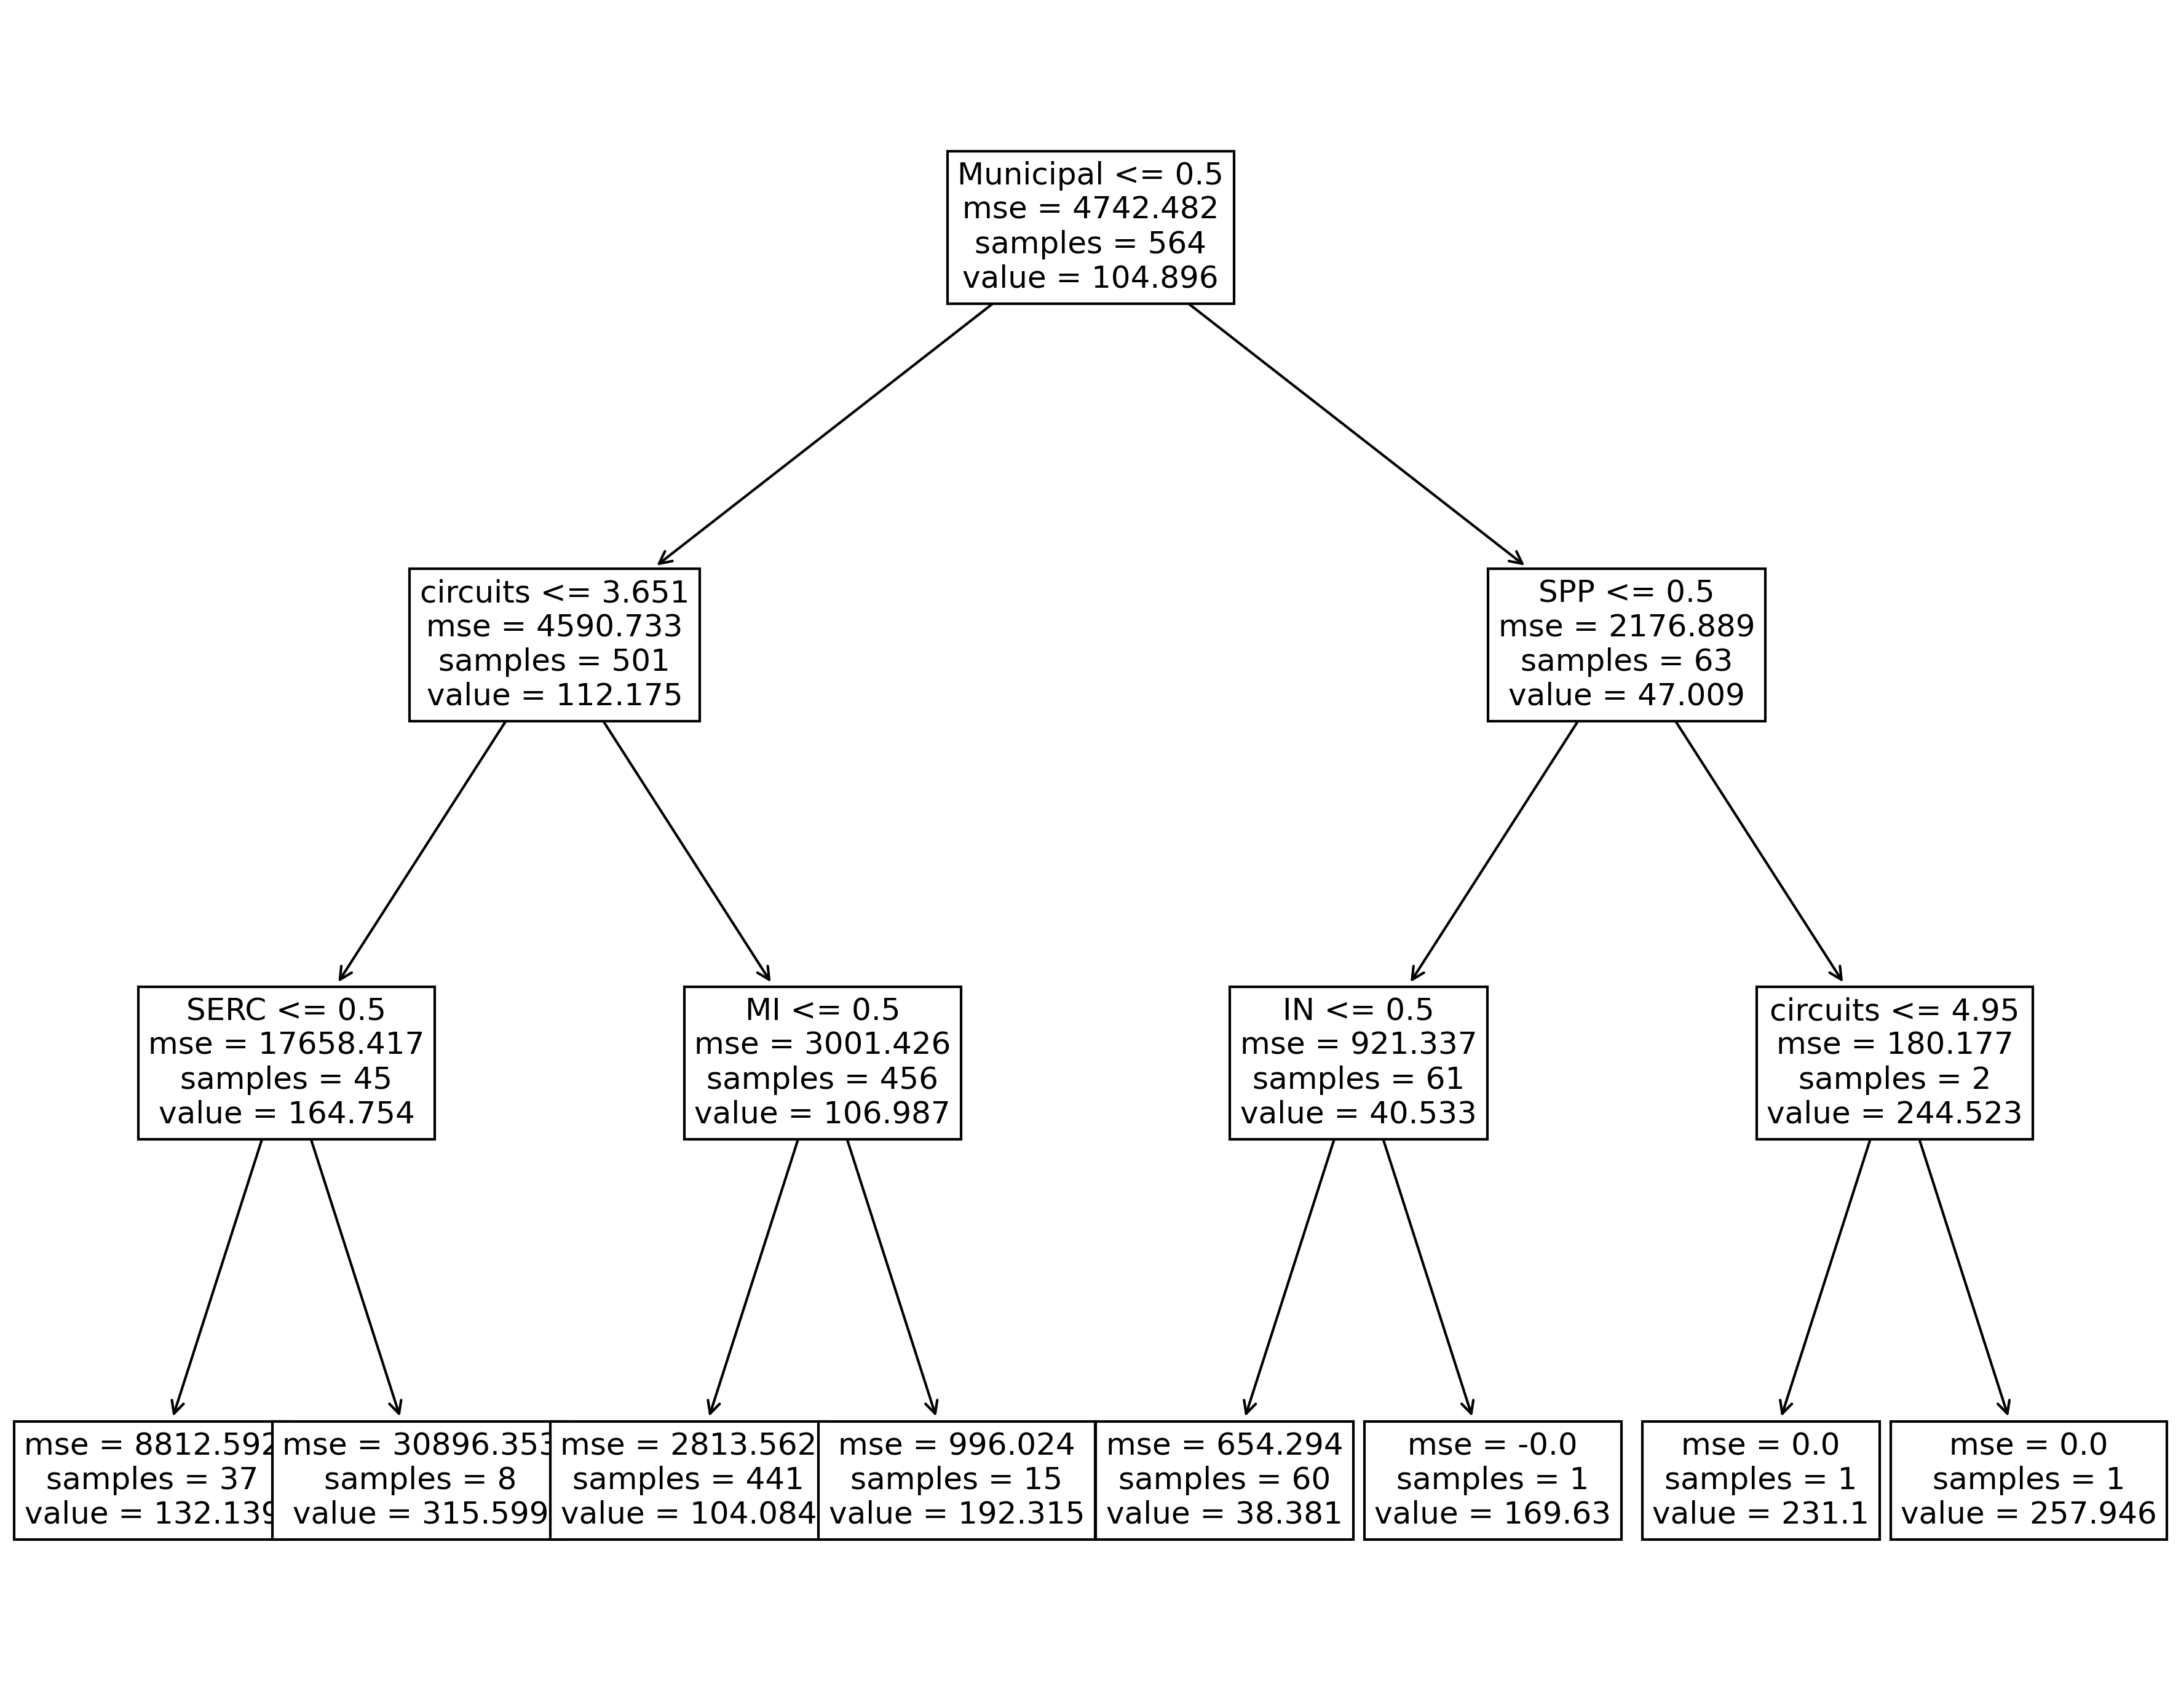

In [484]:
mod = DTree(max_depth=3) # Initialize the modeling object (just as we did)
mod.fit(train_X_log,train_y_log) # Fit the model

# Plot the tree
plt.figure(figsize=(15,12),dpi=300)
rules = tree.plot_tree(mod,feature_names = col_names,fontsize=12)
plt.savefig('experiment_4_decisiontree.png')


### Bagging

In [485]:
bag_scores = cross_validate(Bag(),train_X_log,train_y_log, cv = fold_generator, scoring =use_metrics)

### Random Forest

In [486]:
# takes longer, because 1000 models 
rf_scores = cross_validate(RF(),train_X_log,train_y_log, cv = fold_generator, scoring =use_metrics)

In [487]:
RF().get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

## Compare models

In [488]:
# Collect all the metrics we care about as a dictionary 
# name them by which method we used
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,7.004368e+27
1,lm,6.378154e+03
2,lm,4.359764e+03
3,lm,2.965338e+03
4,lm,1.678673e+27
5,knn,2.623286e+03
6,knn,5.030631e+03
7,knn,4.618220e+03
8,knn,2.607573e+03
9,knn,2.854412e+03


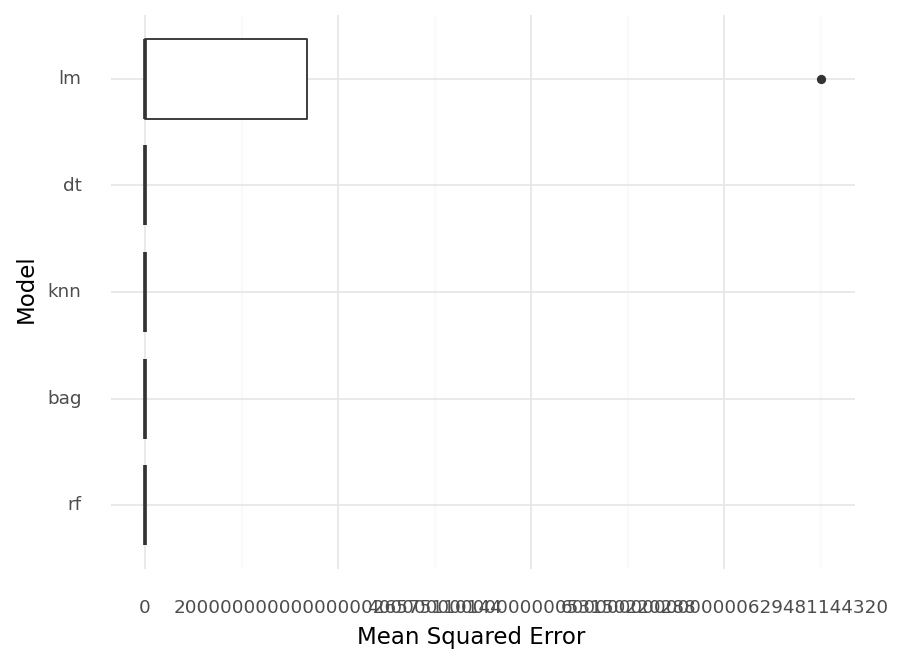

<ggplot: (8783722093765)>

In [489]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

# Hyperparameter tuning

In [490]:
knn_tune_params = {'n_neighbors':[1,2,3,5]}

In [491]:
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [492]:
tune_knn.fit(train_X_log,train_y_log)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'n_neighbors': [1, 2, 3, 5]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [493]:
tune_knn.best_params_

{'n_neighbors': 3}

In [494]:
tune_knn.best_score_

-3443.0420035120937

In [495]:
rf_params = {'n_estimators':[1000,1250], 'max_depth': [30,40], 'max_features': [40,50]} 

tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4, 
                        verbose = 10)

In [496]:
tune_rf.fit(train_X_log,train_y_log)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   39.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   58.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  38 out of  40 | elapsed:  2.5min remaining:    7.9s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  2.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verb

In [497]:
tune_rf.best_params_

{'max_depth': 30, 'max_features': 50, 'n_estimators': 1000}

In [498]:
tune_rf.best_score_

-2526.812263801644

In [499]:
rf_mod = tune_rf.best_estimator_

### RF feature importance: Not Used

In [520]:
rf = RF(n_estimators=1000, max_features=50, max_depth=30)

In [521]:
rf.fit(train_X_log,train_y_log)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features=50, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [522]:
sorted_idx = rf.feature_importances_.argsort()

In [523]:
sorted_idx[-10:]

array([ 5, 12,  3, 38, 26,  6, 18,  4,  1,  0])

In [524]:
train_X_log.columns[sorted_idx]

Index(['HI', 'HI', 'SD', 'DE', 'NM', 'MISO', 'MA', 'OR', 'AL', 'NJ', 'CT',
       'KY', 'MO', 'MN', 'IL', 'CA', 'TRE', 'ND', 'NY', 'ID', 'NPCC', 'MD',
       'Political Subdivision', 'CO', 'IA', 'MS', 'PA', 'NE', 'LA', 'OH', 'WI',
       'GA', 'NH', 'OK', 'Investor Owned', 'Cooperative', 'NV', 'VA', 'MT',
       'TX', 'SC', 'WECC', 'IN', 'voltage', 'KS', 'AZ', 'RFC', 'NC', 'MRO',
       'SPP', 'dem_res_cust_pct', 'SERC', 'nm_pct', 'MI', 'FL', 'circuit_pct',
       'Municipal', 'ee_pct', 'circuits', 'total_mwh'],
      dtype='object')

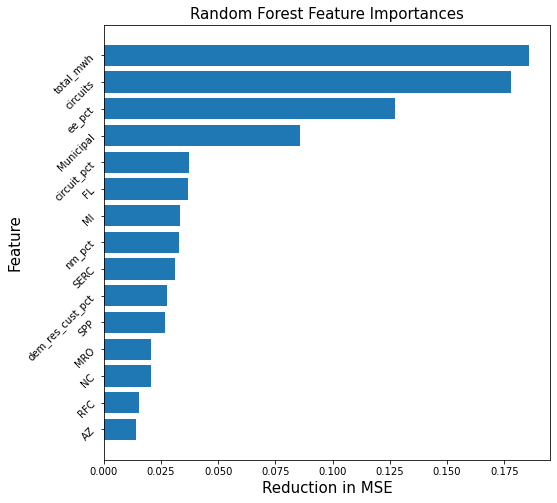

In [525]:
# plt.figure(figsize=(8, 8))
# plt.title("Random Forest Feature Importances", fontsize=15)
# plt.ylabel("Feature", fontsize=15)
# plt.yticks(fontsize=10, rotation=45)
# plt.xticks(fontsize=10)
# plt.xlabel("Reduction in MSE", fontsize=15)
# plt.barh(train_X_log.columns[sorted_idx[-15:]], rf.feature_importances_[sorted_idx[-15:]])

# plt.savefig('experiment_4_rf_importances.png', bbox_inches="tight")

## ML pipeline

In [526]:
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(),  make_column_selector(dtype_exclude=None))])

In [527]:
# initialize our pipeline 
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])

In [528]:
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param, use double underscore to separate model from its parameter__
    {'model' : [KNN(n_neighbors=3)]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF(n_estimators = 1000, max_features = 50, max_depth = 30)]
    }
]

In [529]:
# use 10 folds instead of 5
fold_generator_10 = KFold(n_splits=10, shuffle=True,random_state=111)

In [530]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator_10,
                      scoring='neg_mean_squared_error',
                      n_jobs=4,
                      verbose = 10)

In [531]:
search.fit(train_X_log,train_y_log)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1894s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   24.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre_process',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         <sklearn.compose._column_transf

In [532]:
search.best_score_ # Mean out-of-sample (CV) error

-2442.599755324688

In [533]:
search.best_params_

{'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=30, max_features=50, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)}

In [534]:
rf_mod = search.best_estimator_

## Predictions

In [535]:
test_y_log.describe()

count    189.000000
mean      98.623429
std       75.881984
min        4.830000
25%       57.522000
50%       88.000000
75%      120.223000
max      812.900000
Name: saidi_nomed, dtype: float64

In [536]:
pred_y_log = search.predict(test_X_log)

In [537]:
m.mean_squared_error(test_y_log,pred_y_log)


2828.0755412975814

In [538]:
m.r2_score(test_y_log,pred_y_log)

0.5062380634278506

In [539]:
plot = (
    ggplot(pd.DataFrame(dict(pred=pred_y_log,truth=test_y_log)),
          aes(x='pred',y="truth")) +
    labs(title = 'Model Prediction Accuracy', x = 'Prediction', y = 'Truth') +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

plot.save('experiment_4_accuracy.png', height=6, width=8)

# Trying without outliers

In [652]:
y = df_nona_no_outliers['saidi_nomed']
X = df_nona_no_outliers[['state','type','total_mwh',
           'nerc','circuits','voltage','nm_pct','ee_pct',
           'dem_res_cust_pct','circuit_pct']]

In [653]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1997)

In [654]:
print(train_X.shape[0]/df_nona.shape[0])
print(test_X.shape[0]/df_nona.shape[0])

0.7463479415670651
0.249667994687915


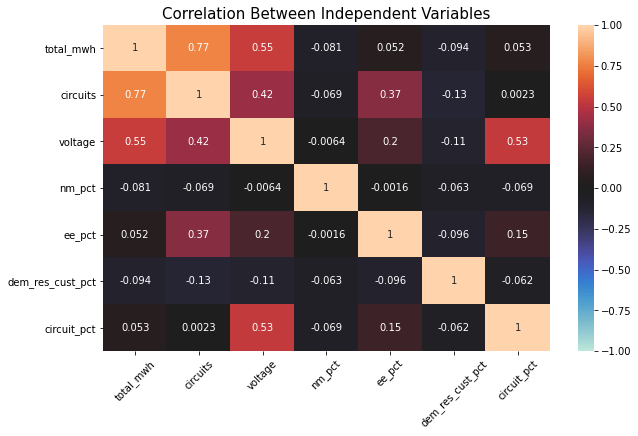

In [655]:
#creating pairwise correlation of columns using Pearson's R,
corr = train_X.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True, 
            vmin = -1, vmax=1, center=0)
plt.xticks(rotation=45) 

plt.title('Correlation Between Independent Variables', fontsize=15)
plt.savefig('correlation_matrix.png', bbox_inches="tight")

In [656]:
df_nona_no_outliers.skew().sort_values(ascending = False)

wind_mwh             19.182059
pv_mwh                7.785318
nm_mwh                7.718233
pv_pct                7.124744
nm_pct                7.004637
wind_pct              5.973463
dem_res_customers     4.828670
purchase_mwh          4.782842
ee_mwh                4.585141
voltage               3.923205
ee_pct                3.561279
total_cust            3.482970
total_mwh             3.246023
circuits              2.910342
dem_res_cust_pct      1.964498
no                    1.517337
saidi_nomed           1.267728
circuit_pct           0.913771
year                 -0.037464
dtype: float64

In [657]:
train_X.circuits

510      64.0
205     775.0
644     769.0
382     131.0
366     251.0
        ...  
106      50.0
250      80.0
659      39.0
307      42.0
572    5484.0
Name: circuits, Length: 562, dtype: float64

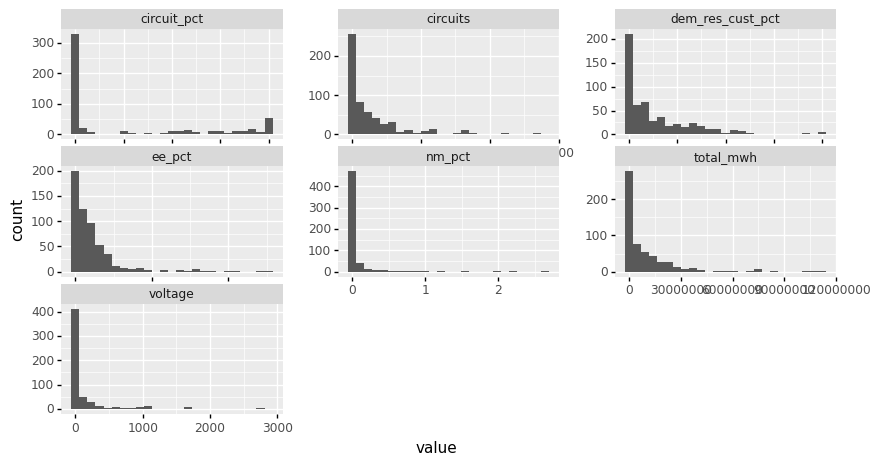

<ggplot: (8783643755165)>

In [658]:
# Plot the continuous variables 
df_num = train_X.select_dtypes(include="number").melt()

(
    ggplot(df_num,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

## Transform the features and outcome

In [659]:
# use full dataset
df_nona_no_outliers_log = df_nona_no_outliers.copy()

# log some variables
df_nona_no_outliers_log['total_mwh'] = np.log(df_nona_no_outliers_log['total_mwh'])
df_nona_no_outliers_log['circuits'] = np.log(df_nona_no_outliers_log['circuits'])
df_nona_no_outliers_log['circuit_pct'] = np.log(df_nona_no_outliers_log['circuit_pct'] + 1)
df_nona_no_outliers_log['ee_pct'] = np.log(df_nona_no_outliers_log['ee_pct'] + 1)

# df_nona_log['voltage'] = np.log(df_nona_log['voltage'] + 1)
#df_nona_log['nm_pct'] = np.log(df_nona_log['nm_pct'] + 1)
#df_nona_log['dem_res_pct'] = np.log(df_nona_log['dem_res_pct'] + 1)

# voltage, net metered, and remand response percent 
median_voltage_pct = df_nona_no_outliers_log.loc[df_nona_no_outliers_log['voltage'] > 0,'voltage'].median()
df_nona_no_outliers_log['voltage'] =  np.where(df_nona_no_outliers_log['voltage']==0,0,np.where(df_nona_no_outliers_log['voltage'] <= median_voltage_pct,1,2))

# demand response pct
median_dr_pct = df_nona_no_outliers_log.loc[df_nona_no_outliers_log['dem_res_cust_pct'] > 0,'dem_res_cust_pct'].median()
df_nona_no_outliers_log['dem_res_cust_pct'] =  np.where(df_nona_no_outliers_log['dem_res_cust_pct']==0,0,np.where(df_nona_no_outliers_log['dem_res_cust_pct'] <= median_dr_pct,1,2))

# nm percent 
median_nm_pct = df_nona_no_outliers_log.loc[df_nona_no_outliers_log['nm_pct'] > 0,'nm_pct'].median()
df_nona_no_outliers_log['nm_pct'] =  np.where(df_nona_no_outliers_log['nm_pct']==0,0,np.where(df_nona_no_outliers_log['nm_pct'] <= median_nm_pct,1,2))

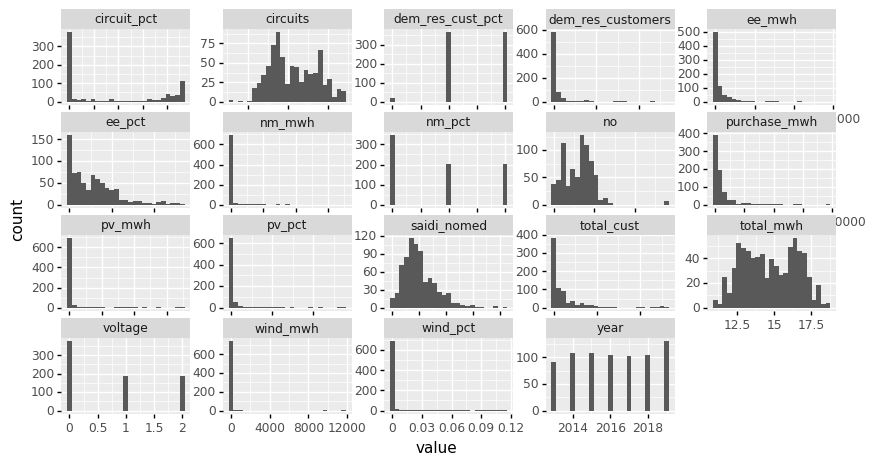

<ggplot: (8783636611649)>

In [660]:
# Plot the continuous variables 
df_nona_num = df_nona_no_outliers_log.select_dtypes(include="number").melt()

(
    ggplot(df_nona_num,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

### Let's dummify NERC regions, state, and utility type

In [661]:
nerc_dummies = pd.get_dummies(df_nona_no_outliers_log.nerc)

In [662]:
# we'll use FRCC as our reference category
nerc_dummies = nerc_dummies.drop(['FRCC'],axis=1)
nerc_dummies.head()

,HI,MISO,MRO,NPCC,RFC,SERC,SPP,TRE,WECC
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [663]:
df_nona_no_outliers_log = pd.concat([df_nona_no_outliers_log.drop(['nerc'],axis=1),nerc_dummies],axis=1)

In [664]:
type_dummies = pd.get_dummies(df_nona_no_outliers_log.type)

In [665]:
# we'll use State as our reference category
type_dummies = type_dummies.drop(['State'],axis=1)
type_dummies.head()

,Cooperative,Investor Owned,Municipal,Political Subdivision
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [666]:
df_nona_no_outliers_log = pd.concat([df_nona_no_outliers_log.drop(['type'],axis=1),type_dummies],axis=1)

In [667]:
state_dummies = pd.get_dummies(df_nona_no_outliers_log.state)

In [668]:
state_dummies

,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,...,NY,OH,OK,OR,PA,SC,SD,TX,VA,WI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
749,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [669]:
# we'll use AR as our reference category
state_dummies = state_dummies.drop(['AR'],axis=1)
state_dummies.head()

,AL,AZ,CA,CO,CT,DE,FL,GA,HI,IA,...,NY,OH,OK,OR,PA,SC,SD,TX,VA,WI
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [670]:
df_nona_no_outliers_log = pd.concat([df_nona_no_outliers_log.drop(['state'],axis=1),state_dummies],axis=1)

In [671]:
df_nona_no_outliers_log.columns

Index(['year', 'name', 'total_mwh', 'total_cust', 'no', 'saidi_nomed',
       'saifi_nomed', 'caidi_nomed', 'circuits', 'voltage', 'gen_mwh',
       'purchase_mwh', 'pv_mwh', 'wind_mwh', 'nm_mwh', 'ee_mwh',
       'dem_res_customers', 'dem_res_mwh', 'pv_pct', 'wind_pct', 'nm_pct',
       'ee_pct', 'dem_res_cust_pct', 'circuit_pct', 'HI', 'MISO', 'MRO',
       'NPCC', 'RFC', 'SERC', 'SPP', 'TRE', 'WECC', 'Cooperative',
       'Investor Owned', 'Municipal', 'Political Subdivision', 'AL', 'AZ',
       'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TX',
       'VA', 'WI'],
      dtype='object')

In [672]:
df_nona_no_outliers_log.shape

(750, 77)

## Features I'm using
- Control: Type, State, NERC, total MWH, circuit pct
- NM pct, EE pct, Dem res customer pct

In [673]:
y = df_nona_no_outliers_log['saidi_nomed']

In [674]:
X = df_nona_no_outliers_log.drop(columns=['year','name', 'total_cust', 'no', 'saidi_nomed',
       'saifi_nomed', 'caidi_nomed', 'gen_mwh',
       'dem_res_customers', 'dem_res_mwh', 'pv_pct', 'wind_pct',    
       'purchase_mwh', 'pv_mwh', 'wind_mwh', 'nm_mwh', 'ee_mwh'])

In [675]:
train_X_log, test_X_log, train_y_log, test_y_log = train_test_split(X,y,test_size=.25,random_state=1997)

In [676]:
train_X_log.columns

Index(['total_mwh', 'circuits', 'voltage', 'nm_pct', 'ee_pct',
       'dem_res_cust_pct', 'circuit_pct', 'HI', 'MISO', 'MRO', 'NPCC', 'RFC',
       'SERC', 'SPP', 'TRE', 'WECC', 'Cooperative', 'Investor Owned',
       'Municipal', 'Political Subdivision', 'AL', 'AZ', 'CA', 'CO', 'CT',
       'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TX', 'VA', 'WI'],
      dtype='object')

# Hyperparameter tuning

In [677]:
knn_tune_params = {'n_neighbors':[1,2,3,5]}

In [678]:
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [679]:
tune_knn.fit(train_X_log,train_y_log)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'n_neighbors': [1, 2, 3, 5]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [680]:
tune_knn.best_params_

{'n_neighbors': 3}

In [681]:
tune_knn.best_score_

-2085.2438370760938

In [682]:
rf_params = {'n_estimators':[1000,1250], 'max_depth': [30,40], 'max_features': [40,50]} 

tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4, 
                        verbose = 10)

In [683]:
tune_rf.fit(train_X_log,train_y_log)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   54.8s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  38 out of  40 | elapsed:  1.5min remaining:    4.6s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  1.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verb

In [684]:
tune_rf.best_params_

{'max_depth': 40, 'max_features': 40, 'n_estimators': 1250}

In [685]:
tune_rf.best_score_

-1600.7409272350865

In [686]:
rf_mod = tune_rf.best_estimator_

## ML pipeline

In [687]:
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(),  make_column_selector(dtype_exclude=None))])

In [688]:
# initialize our pipeline 
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])

In [689]:
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param, use double underscore to separate model from its parameter__
    {'model' : [KNN(n_neighbors=3)]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF(n_estimators = 1250, max_features = 40, max_depth = 40)]
    }
]

In [690]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator_10,
                      scoring='neg_mean_squared_error',
                      n_jobs=4,
                      verbose = 10)

In [691]:
search.fit(train_X_log,train_y_log)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0448s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1558s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   32.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre_process',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         <sklearn.compose._column_transf

In [692]:
search.best_score_ # Mean out-of-sample (CV) error

-1510.832292533517

In [693]:
search.best_params_

{'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=40, max_features=40, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1250, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)}

In [695]:
rf_mod = search.best_estimator_

## Predictions

In [696]:
test_y_log.describe()

count    188.000000
mean     101.212559
std       63.662733
min        6.300000
25%       58.770000
50%       85.890000
75%      138.970000
max      389.436000
Name: saidi_nomed, dtype: float64

In [697]:
pred_y_log = search.predict(test_X_log)

In [698]:
m.mean_squared_error(test_y_log,pred_y_log)


1569.627102031136

In [699]:
m.r2_score(test_y_log,pred_y_log)

0.6106482105871829

In [814]:
plot = (
    ggplot(pd.DataFrame(dict(pred=pred_y_log,truth=test_y_log)),
          aes(x='pred',y="truth")) +
    labs(title = 'Model Prediction Accuracy', x = 'Prediction', y = 'Truth') +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkblue",size=1) +
    theme(figure_size=(10,7))
)

plot.save('./deliverables/experiment_4_accuracy.png', height=6, width=8)

## RF Permutation Importance

In [727]:
vi = permutation_importance(rf_mod,train_X_log,train_y_log,n_repeats=25, n_jobs=-1)

In [729]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X_log.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important

vi_dat = vi_dat.sort_values(by="vi",ascending=False)[:11].reset_index(drop=True)

vi_dat

,variable,vi,std,low,high
0,circuits,0.326655,0.018611,0.289432,0.363878
1,Municipal,0.305037,0.025851,0.253336,0.356739
2,dem_res_cust_pct,0.254403,0.023329,0.207745,0.301062
3,total_mwh,0.205338,0.010811,0.183717,0.226959
4,ee_pct,0.118191,0.006500,0.105191,0.131191
5,circuit_pct,0.094394,0.006480,0.081434,0.107353
6,MI,0.084763,0.011687,0.061389,0.108136
7,nm_pct,0.073650,0.005289,0.063073,0.084227
8,NC,0.047505,0.006798,0.033908,0.061102
9,AZ,0.045783,0.009340,0.027103,0.064463


In [813]:
# Plot

plot = (
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),color = "darkblue",width=.2) +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() + 
    labs(y="Reduction in MSE",x="Variable", title = "Permutation Variable Importance")
)

plot.save('./deliverables/experiment_4_variable_importance.png')

## Skewedness demonstration for report

In [450]:
circuits_report = train_X.copy().drop(columns = train_X.loc[:, train_X.columns != 'circuits'])

In [451]:
circuits_report = circuits_report.rename(columns = {"circuits": "Circuits"})

In [452]:
circuits_report['Circuits (Log Transformed)'] = np.log(circuits_report['Circuits'])

In [453]:
circuits_report

,Circuits,Circuits (Log Transformed)
202,54.0,3.988984
644,769.0,6.645091
379,133.0,4.890349
363,19.0,2.944439
218,4518.0,8.415825
...,...,...
103,291.0,5.673323
247,191.0,5.252273
656,186.0,5.225747
304,780.0,6.659294


In [831]:
# Generate side by side comparison
plot = (
    ggplot(circuits_report.melt(),aes(x="value")) +
    geom_histogram(bins=25, fill="darkblue") +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,4),
          subplots_adjust={'wspace':0.25}) +
    xlab("Number of Circuits") +
    ylab("Frequency"))

plot.save('./deliverables/skewedness_demonstration.png')